In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('./dataset/train_all.csv', nrows=None)
test_data = pd.read_csv('./dataset/test_all.csv', nrows=None)

In [3]:
features_columns = [col for col in train_data.columns if col not in ['user_id', 'label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target = train_data['label'].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=2,
                             random_state=0,
                             n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(1200, 227) (1200,)
(800, 227) (800,)


0.9275

#### 简单验证

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    random_state=0, n_jobs=-1
)
scores = cross_val_score(clf, train, target, cv=5)
print(scores)
print('Accuracy : %.2f' % scores.mean())

In [6]:
# F1值评价模型
from sklearn import metrics
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    random_state=0, n_jobs=-1
)
scores = cross_val_score(clf, train, target, cv=5, scoring='f1_macro')
print(scores)
print('Accuracy : %.2f' % scores.mean())

[0.48387097 0.48320413 0.48320413 0.48320413 0.48320413]
Accuracy : 0.48


#### 交叉验证

In [ ]:
#使用ShuffleSplit切分数据
from sklearn.model_selection import ShuffleSplit
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    random_state=0, n_jobs=-1
)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, train, target, cv=cv)
print(scores)
print('Accuracy : %.2f' % scores.mean())

In [8]:
# 使用KFold切分数据
import numpy as np
from sklearn.model_selection import KFold

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=2,
    random_state=0, n_jobs=-1
)
kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    scores = clf.score(X_test, y_test)
    # print(scores)
    print('k, Accuracy : %.2f' % scores.mean())

k, Accuracy : 0.94
k, Accuracy : 0.93
k, Accuracy : 0.94
k, Accuracy : 0.93
k, Accuracy : 0.95


In [10]:
# 使用StratifiedKFold切分数据

#### 模型调参

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.5, random_state=0)

clf = RandomForestClassifier(n_jobs=-1)

tuned_params = {
    'n_estimators': [50,100,200],

}
scores = ['precision']
for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()

    clf = GridSearchCV(clf, tuned_params, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print('Best parameters set found on development set:')
    print(clf.best_params_)
    print()
    print('Grid scores on development set:')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, param in zip(means, stds, clf.cv_results_['params']):
        print('%0.3f (+/-%0.03f for %r' % (mean, std, param))

# Tuning hyper-parameters for precision

Best parameters set found on development set:
{'n_estimators': 200}

Grid scores on development set:
0.572 (+/-0.201 for {'n_estimators': 50}
0.572 (+/-0.200 for {'n_estimators': 100}
0.622 (+/-0.200 for {'n_estimators': 200}


/Users/sunjiabin/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 混淆矩阵

confusion matrix, without normalization
[[459   8]
 [ 31   2]]
normalized confusion matrix
[[0.98 0.02]
 [0.94 0.06]]


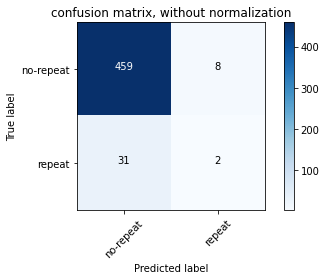

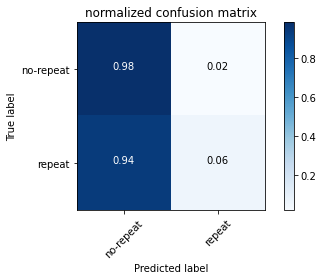

In [14]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['no-repeat', 'repeat']
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('normalized confusion matrix')
    else:
        print('confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      title='confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      normalize=True,
                      title='normalized confusion matrix')

plt.show()

In [15]:
class_names = ['no-repeat', 'repeat']
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = RandomForestClassifier(n_jobs=-1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

   no-repeat       0.94      0.99      0.96       467
      repeat       0.14      0.03      0.05        33

    accuracy                           0.92       500
   macro avg       0.54      0.51      0.51       500
weighted avg       0.88      0.92      0.90       500



### 不同的分类模型

In [20]:
# 1. 逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
X = stdscaler.fit_transform(train)
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/sunjiabin/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.906

In [21]:
# 2. KNN模型
from sklearn.neighbors import KNeighborsClassifier
stdscaler = StandardScaler()
X = stdscaler.fit_transform(train)
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.924

In [22]:
# 3. 高斯贝叶斯模型
from sklearn.naive_bayes import GaussianNB
stdscaler = StandardScaler()
X = stdscaler.fit_transform(train)
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)
clf = GaussianNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.436

In [23]:
# 4. 决策树模型
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.874

In [24]:
# 5. Bagging模型
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5).fit(X_train, y_train)
clf.score(X_test, y_test)

0.934

In [25]:
# 6. 随机森林
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = RandomForestClassifier(n_estimators=10,
                             max_depth=None,
                             min_samples_split=2,
                             random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.924

In [26]:
# 7. 极端随机树模型
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = ExtraTreesClassifier(n_estimators=10,
                             max_depth=None,
                             min_samples_split=2,
                             random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.922

In [27]:
# 8. AdaBoost模型
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.934

In [28]:
# 9. GBDT模型
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
clf = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.92

In [31]:
# 10. 集成学习
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
X = stdscaler.fit_transform(train)
y = target
clf1 = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial',
                          random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf],
                      ['LogisticRegression', 'RandomForestClassifier', 'GaussianNB', 'Voting']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print('accuracy: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), label))

/Users/sunjiabin/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sunjiabin/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

accuracy: 0.90 (+/- 0.01) [LogisticRegression]
accuracy: 0.93 (+/- 0.00) [RandomForestClassifier]
accuracy: 0.47 (+/- 0.01) [GaussianNB]
accuracy: 0.90 (+/- 0.00) [Voting]


In [32]:
# 11. LGB模型
import lightgbm
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = lightgbm
train_matrix = clf.Dataset(X_train, label=y_train)
test_matrix = clf.Dataset(X_test, label=y_test)

params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'min_child_weight': 1.5,
    'num_leaves': 2**5,
    'lambda_l2': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'learning_rate': 0.03,
    'tree_method': 'exact',
    'seed': 2021,
    'num_class': 2,
    'silent': True
}
num_round = 10000
early_stopping_rounds = 100
model = clf.train(params,
                  train_matrix,
                  num_round,
                  valid_sets=test_matrix,
                  early_stopping_rounds=early_stopping_rounds)
pre = model.predict(X_valid, num_iteration=model.best_iteration)

/Users/sunjiabin/anaconda3/envs/ml/lib/python3.7/site-packages/lightgbm/basic.py:1077: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30834
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 220
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Info] Start training from score -0.060989
[LightGBM] [Info] Start training from score -2.827397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [33]:
# 12. XGB 模型
# 11. LGB模型
import xgboost
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

clf = xgboost
train_matrix = clf.DMatrix(X_train, label=y_train, missing=-1)
test_matrix = clf.DMatrix(X_test, label=y_test, missing=-1)
z = clf.DMatrix(X_valid, label=y_valid, missing=-1)
params = {
    'booster': 'gbtree',
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'gamma': 1,
    'min_child_weight': 1.5,
    'max_depth': 5,
    'lambda': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 0.7,
    'eta': 0.03,
    'tree_method': 'exact',
    'seed': 2021,
    'num_class': 2
}

num_round = 10000
early_stopping_rounds = 100
watchlist = [(train_matrix, 'train'), (test_matrix, 'eval')]

model = clf.train(params,
                  train_matrix,
                  num_round,
                  evals=watchlist,
                  early_stopping_rounds=early_stopping_rounds)
pre = model.predict(z, ntree_limit=model.best_ntree_limit)

[0]	train-mlogloss:0.67009	eval-mlogloss:0.67241
[1]	train-mlogloss:0.64850	eval-mlogloss:0.65310
[2]	train-mlogloss:0.62842	eval-mlogloss:0.63515
[3]	train-mlogloss:0.60912	eval-mlogloss:0.61784
[4]	train-mlogloss:0.59075	eval-mlogloss:0.60151
[5]	train-mlogloss:0.57336	eval-mlogloss:0.58619
[6]	train-mlogloss:0.55690	eval-mlogloss:0.57177
[7]	train-mlogloss:0.54149	eval-mlogloss:0.55826
[8]	train-mlogloss:0.52653	eval-mlogloss:0.54500
[9]	train-mlogloss:0.51234	eval-mlogloss:0.53292
[10]	train-mlogloss:0.49887	eval-mlogloss:0.52109
[11]	train-mlogloss:0.48619	eval-mlogloss:0.50997
[12]	train-mlogloss:0.47398	eval-mlogloss:0.49988
[13]	train-mlogloss:0.46261	eval-mlogloss:0.48999
[14]	train-mlogloss:0.45158	eval-mlogloss:0.48062
[15]	train-mlogloss:0.44105	eval-mlogloss:0.47175
[16]	train-mlogloss:0.43087	eval-mlogloss:0.46331
[17]	train-mlogloss:0.42110	eval-mlogloss:0.45521
[18]	train-mlogloss:0.41154	eval-mlogloss:0.44734
[19]	train-mlogloss:0.40249	eval-mlogloss:0.43999
[20]	train

In [34]:
print('score: ', np.mean((pre[:,1] > 0.5) == y_valid))

score:  0.9475


### 自己封装模型

In [ ]:
# Stacking Bootstrap Bagging